In [65]:
# Make sure that you have installed the tweepy library 
# conda install -c conda-forge tweepy
import math

In [66]:
path = ''

In [67]:
from __future__ import division

In [68]:
def getAuthData():
    import csv
    with open(path+'auth.txt', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)

    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]

    return authdata

In [70]:
authdata = getAuthData()

In [71]:
import tweepy

In [72]:
def getTwitterData(searchTerm, authdata):

    consumer_key = authdata['CONSUMER_KEY']
    consumer_secret = authdata['CONSUMER_SECRET']
    access_token = authdata['OAUTH_TOKEN']
    access_token_secret = authdata['OAUTH_TOKEN_SECRET']
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    
    searchCount = 1800 # The number of tweets you want ... you never get that !
     
    results = api.search(q=searchTerm, count=searchCount)

    print("Search completed ...")
    
    twts = []
    for result in results:
        twts.append(result.text)    

    print("List of tweets assembled ... for ", searchTerm)    
        
    return (twts)

In [73]:
# Testing ...
tweetTexts = getTwitterData('@United', authdata)

Search completed ...
List of tweets assembled ... for  @United


In [74]:
# Testing the function to write the tweet to a text file
with open(path+'tw_delta.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))    

In [75]:
# Get and save twitter data

tweetTexts = getTwitterData('@Delta', authdata)
with open(path+'tw_delta.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@United', authdata)
with open(path+'tw_united.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@USAirways', authdata)
with open(path+'tw_usair.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@Southwest', authdata)
with open(path+'tw_southwest.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@American', authdata)
with open(path+'tw_american.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  
tweetTexts = getTwitterData('@JetBlue', authdata)
with open(path+'tw_jetblue.txt', 'w', encoding="utf-8") as f:
    for item in tweetTexts:
        f.write("{}\n".format(item))  


Search completed ...
List of tweets assembled ... for  @Delta
Search completed ...
List of tweets assembled ... for  @United
Search completed ...
List of tweets assembled ... for  @USAirways
Search completed ...
List of tweets assembled ... for  @Southwest
Search completed ...
List of tweets assembled ... for  @American
Search completed ...
List of tweets assembled ... for  @JetBlue


In [76]:
# Get negative and positive word lists
def getWordLists():
    negative = [line.strip() for line in open(path+'neg.txt')]
    negative = [n for n in negative if n != [] ]
    negative = [n for n in negative if n != '' ]
    negative = [n for n in negative if n[0] != ';']
    
    positive = [line.strip() for line in open(path+'pos.txt')]
    positive = [n for n in positive if n != [] ]
    positive = [n for n in positive if n != '' ]
    positive = [n for n in positive if n[0] != ';']

    return negative, positive

In [77]:
negative , positive= getWordLists()
#print (negative)

In [78]:
# Data cleaning + Sentiment scores

def remove_punctuation(s):
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in s:
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz "):
            s_sans_punct += letter
    return s_sans_punct

def getLowerCaseText(status_texts):
    lowered_texts = []
    for texts in status_texts:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
    return lowered_texts

def getCleanedTweets(lowered_texts):
    cleanedTweets = []
    for text in lowered_texts:
        wordlist = str(text).split()
        wordlist_nopun = [ str(remove_punctuation(for_a_word)) for for_a_word in wordlist ]
        cleanedTweets.append(wordlist_nopun)
    return cleanedTweets

def GetSentimentScores(cleanedTweets, negative, positive):
    freqList = []
    for eachTweet in cleanedTweets:
        posScore = len(set(eachTweet) & set(positive))
        negScore = len(set(eachTweet) & set(negative))
        freqList.append(posScore-negScore)
    return freqList

In [79]:
# Plotting routines

In [80]:
# Plotting routines

def plotHist(freqList):
    import matplotlib.pyplot as plt
    plt.hist(freqList)

def getTwitterScore(freqList):
    veryNegative = len([x for x in freqList if x<=-2])
    veryPositive = len([x for x in freqList if x>=+2])
    try:
        twitterScore = 100 * (float (veryPositive) / (veryNegative + veryPositive))
        return round(twitterScore, 2)
    except:
        return(math.nan)

In [81]:
# Get airline data
# This should work --- but is not working as of today 
# I have created an alternative function below - manual data entry ... ugh!!
def getAirlineData():
    from bs4 import BeautifulSoup as bs  
    import requests
    url = 'http://theacsi.org/index.php?option=com_content&view=article&id=149&catid=&Itemid=214&i=Airlines'
    r = requests.get(url)
    airlinesSatPage = r.text       
    soup = bs(airlinesSatPage, "html.parser")

    allRows = soup.findAll('tr',{'class':'Company'})
    tableData = []
    for row in allRows:
        eachRow = []
        cells = row.findAll('td',{'class':'sortcolumn Y2017'})
        for cell in cells:
            eachRow.append(str(cell.text.strip()))
        tableData.append(eachRow)

    airline = [ x[0] for x in tableData ]
    score   = [ x[21] for x in tableData ]
    airlineDict = { 'airlines': airline,
                    'score'   : score
                  }
    
    return airlineDict  

In [82]:
def getAirlineDataAlt():
    airlineDict = {}
    airlineDict = {'JetBlue':82, 
                   'Southwest':80,
                   'American':76,
                   'Delta':76,
                   'United':70
                  }
    return airlineDict

In [83]:
airlineScores = getAirlineDataAlt()

In [84]:
print(airlineScores)

{'JetBlue': 82, 'Southwest': 80, 'American': 76, 'Delta': 76, 'United': 70}


In [85]:
def getScore(fileName):
    fn = path+fileName+'.txt'
    with open(fn,'r',encoding="utf-8") as f:
        tweetTexts = f.readlines()
        
    lowered_texts = getLowerCaseText(tweetTexts)
    cleanedTweets = getCleanedTweets(lowered_texts)
    freqList = GetSentimentScores(cleanedTweets, negative, positive)
    score = getTwitterScore(freqList)
    return(score)

In [86]:
scores = {}

scores = {'American': getScore('tw_american'),
          'Delta': getScore('tw_delta'),
          'JetBlue':  getScore('tw_jetblue'),
          'Southwest': getScore('tw_southwest'),
          'United': getScore('tw_united'),
          'USAirways': getScore('tw_usair')
         }

print(scores)

{'American': 44.44, 'Delta': 80.0, 'JetBlue': 66.67, 'Southwest': 7.14, 'United': 61.54, 'USAirways': nan}


In [87]:
import pandas as pd
twdf = pd.DataFrame.from_dict(scores, orient='index')
twdf.columns = ['twitterScore']
print(twdf)

           twitterScore
American          44.44
Delta             80.00
JetBlue           66.67
Southwest          7.14
United            61.54
USAirways           NaN


In [88]:
import pandas as pd
airdf = pd.DataFrame.from_dict(airlineScores, orient='index')
airdf.columns = ['airlineScore']
print(airdf)

           airlineScore
JetBlue              82
Southwest            80
American             76
Delta                76
United               70


In [89]:
set(["a","b","c"]) & set(["a","d","c"])


{'a', 'c'}

In [90]:
result = pd.concat([twdf, airdf], axis=1, join='inner')

In [91]:
print(result)

           twitterScore  airlineScore
American          44.44            76
Delta             80.00            76
JetBlue           66.67            82
Southwest          7.14            80
United            61.54            70


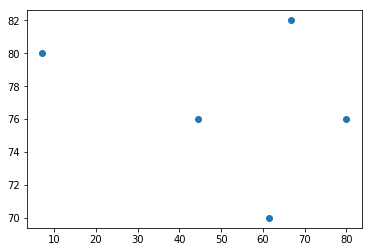

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(result['twitterScore'], result['airlineScore'])